In [60]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [61]:
import numpy
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)

In [62]:
data = pd.read_csv('../data/master.csv')

In [63]:
def extract_date(data):
    date, _ = data.split(' ')
    return date

In [129]:
data.shape

(15214, 38)

In [65]:
data['date'] = data['timestamp'].apply(lambda x : extract_date(x))
data['date'] =  pd.to_datetime(data['date'])
data['date'].head()

0   2014-03-27
1   2014-05-03
2   2014-10-12
3   2013-11-16
4   2014-02-23
Name: date, dtype: datetime64[ns]

In [66]:
data['timestamp'] = pd.to_datetime(data['timestamp'])
data['timestamp'].head()

0   2014-03-27 09:00:00
1   2014-05-03 18:26:00
2   2014-10-12 10:10:00
3   2013-11-16 08:21:00
4   2014-02-23 21:15:00
Name: timestamp, dtype: datetime64[ns]

In [67]:
data['day'] = data['timestamp'].dt.day
data['month'] = data['timestamp'].dt.month
data['year'] = data['timestamp'].dt.year
data['dayofweek'] = data['timestamp'].dt.dayofweek

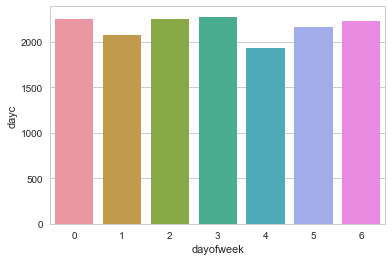

In [126]:
# Day Analysis
# Monday=0, Sunday=6
select_cols = ['dayofweek', 'Case-Id']
train_df = data[select_cols]
date_df = train_df.groupby(['dayofweek'], as_index=True).agg(['count'])
date_df['dayofweek'] = date_df.index
date_df['dayc'] = date_df['Case-Id']['count']
#date_df.head()
ax = sns.barplot(x="dayofweek", y="dayc", data=date_df)
# Wednesday has the highest number of cases

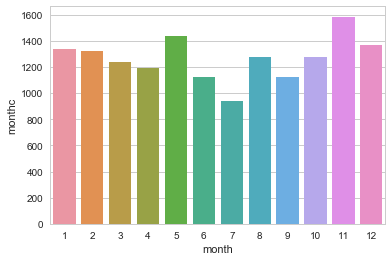

In [128]:
# May has the most number of cases
select_cols = ['month', 'Case-Id']
train_df = data[select_cols]
date_df = train_df.groupby(['month'], as_index=True).agg(['count'])
date_df['month'] = date_df.index
date_df['monthc'] = date_df['Case-Id']['count']
#date_df.head()
ax = sns.barplot(x="month", y="monthc", data=date_df)

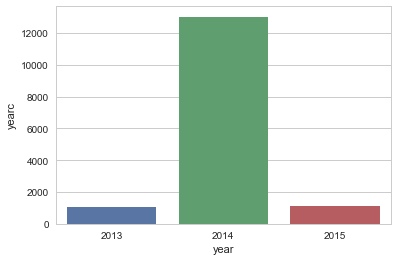

In [130]:
select_cols = ['year', 'Case-Id']
train_df = data[select_cols]
date_df = train_df.groupby(['year'], as_index=True).agg(['count'])
date_df['year'] = date_df.index
date_df['yearc'] = date_df['Case-Id']['count']
#date_df.head()
ax = sns.barplot(x="year", y="yearc", data=date_df)